# Fit and Apply Neural Network Model

In this exercise we fit and apply a neural network model on a Synthetic and Real Dataset and ‎Evaluate the Results.

**Learning Outcomes**
1. Fit and apply a Neural Network on a Synthetic and Real data
2. Fit and apply a linear regression model using *Sochastic* Gradient descent
3. Compare between the capabilities of the linear and non-linear models
4. Examine the effect of number of hidden units on the predictive capabilities of the neural ‎network
5. Ability to interpret the results of the prediction


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import time

# Generate the Data

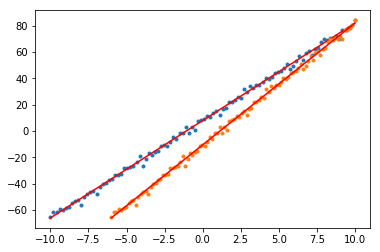

In [2]:
# generate the data
def realFunc(x1,x2):
    return 2 + 5*x1 + 3*x2
    #return 2 + 5*x1**2
def generate_data(N=100):
    N = N
    noise = 2 #40
    x1 = np.linspace(-10.0,10.0,N) 
    x2 = np.linspace(-6.0,10.0,N) 
    t1 = np.random.normal(realFunc(x1,x2),noise) # target

    #plot the data along the real model
    plt.plot(x1,t1,'.')
    plt.plot(x1,realFunc(x1,x2),'r')

    plt.plot(x2,t1,'.')
    plt.plot(x2,realFunc(x1,x2),'r')
    # generate model solution

    X = np.c_[x1,x2]
    return X, t1


X, t = generate_data()

In [3]:
X.shape

(100, 2)

In [4]:
def outSGD(J, w, tme, name='SGD',ax=None, plotJ=True, printw=True):        
    if plotJ:
        ax = ax or plt.gca()
        ax.plot(J[1:],'.b')
    if printw:
        print("y ={}+ {}x1".format(w[0],w[1]), " {} took:    {} seconds ".format(name, tme))


In [5]:
def SGD(w,X,t):                                      # vectorised
    N    = len(t)                                    # number of data points
    grad = -(1.0/(  N))*X.T*(t - X*w)                # gradient
    J    =  (1.0/(2*N))*    (t - X*w).T * (t - X*w)  # the loss
    return grad, J

In [6]:
def SGD_miniBatch_Learn(X1,t, eta=0.01, maxep=100, decay=0.9): #,  **kwargs): # vectorised
    start_time = time.time()
    # data perperation......................................
    N = X1.shape[0]
    M = X1.shape[1]
    b = 20                                # mini-batch size
    
    x0= np.ones(N)              
    X = np.c_[x0, X1]                      # add dummy feature
    
    X = np.matrix(X)
    t = np.matrix(t).T

    w_all = []        
    w = np.ones((M+1,1))                  # initialise w
    J = np.zeros((maxep))                 # the loss in each epoch
    
    for ep in range(maxep):               # epochs
        for tau in range(int(N/b)):       # batches
            X_= X[tau*b:(tau+1)*b,:]
            t_= t[tau*b:(tau+1)*b]
            grad, J_ = SGD(w,X_,t_)
            w   -= eta*grad
            J[ep]+=J_
        eta *= decay
            #w_all.append(w)

    tme = time.time() - start_time
    return w, J, tme, w_all 


def predict(X, w):
    N =X.shape[0]
    X = np.c_[np.ones(N), X]
    return X.dot(w).reshape(N)

averaged model error = 2.7885994410094064
y =[0.83329717]+ [4.57666481]x1  SGD_vectrzd took:    0.0059833526611328125 seconds 
[[0.83329717]
 [4.57666481]
 [3.52792619]]


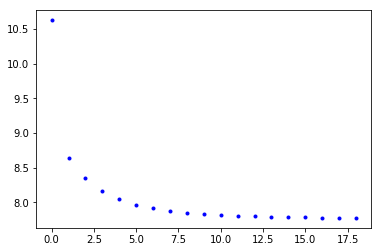

In [7]:
w, J, tme,_ = SGD_miniBatch_Learn(X, t, eta=0.01, maxep=20, decay=0.95) #, eta, maxep, decay,ax2)

print('averaged model error =', np.sqrt(J[-1]))      # note that this will be close to the noise that we add when we generated the data

outSGD(J, w, tme, 'SGD_vectrzd')
print(w)

# Multi-Layers Neural Network with Sigmoid and Linear Activaiton Functions Respectively

## Fit and Apply a Neural Network on Our Previous Synthetic  Data

Let us try a neural network now on our data

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from time import time

In [9]:
# X, t = generate_data() # uncoment if you want to regenrate a new fresh data

In [10]:
regr  = MLPRegressor(random_state=1, hidden_layer_sizes=(5,3), max_iter=10000).fit(X, t)
y_nn  = regr.predict(X)
R2    = regr.score(X, t)
y_SGD = predict(X, w)


Now we compare between the capabilities of the two models. We need to calculate the R2.
We can calculate the SSD and SST easily:

1. SSD is the sum of squared prediction errors
2. SST is the sum of squared error from the mean of the target
3. R2 = 1- SSD/SST

It shows how better is our prediction in comparison with predicting via the mean of the targets

In [11]:
SSE1 = ((t - y_SGD)**2).sum()
SSE2 = ((t - y_nn )**2).sum()
SST  = ((t - t.mean())**2).sum()
R2_SGD = 1- SSE1/SST
R2_NN  = 1- SSE2/SST


print(R2_SGD)
print(R2_NN)
print(R2)  # R2 is identical with R2_NN

0.998332008744131
0.9983015815351745
0.9983015815351745


This shows that our prediction and the Neural Networks prediction are both very good for this simple data. Our SGD is faster because it has less built-in optimisations. Of course SGD is less capable when the data is non-linear.

In [12]:
SST = ((t -      t.mean())**2).sum()
SSE = ((t - predict(X, w))**2).sum()
print(SSE)
print(SST)
print(1- SSE/SST)

310.7895063393329
186325.62086028603
0.998332008744131


Let us now generate new data via sklearn and apply a neural network regressor on the data

In [13]:
X, y = make_regression(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=1)

regr = MLPRegressor(random_state=1,hidden_layer_sizes=(5,4),max_iter=10000).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-0.27025966896459463

Let us examine the coefficients

In [14]:
regr.coefs_[1:]

[array([[ 1.71509841e-216,  1.50055803e+000, -9.40878048e-001,
          1.30699351e+000],
        [-1.14341012e-168, -4.09133040e-001,  1.77402019e+000,
          9.76278847e-001],
        [-4.69906536e-166,  1.29236375e+000, -1.26966315e+000,
          1.06428740e+000],
        [ 6.05517197e-155,  1.22768913e+000,  1.35355091e+000,
          1.66881026e+000],
        [ 5.83890954e-214,  1.99459187e+000,  3.39801125e-001,
          1.40959444e+000]]), array([[ 1.08036086e-192],
        [ 2.19621545e+000],
        [-6.86402391e+000],
        [ 2.25955633e+000]])]

## Fit and Apply Neural Network Model on Housing Data

Ok now we are ready to apply a neural network to regress the hous prices in Claifronia :)

In [15]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

### Load the data

In [16]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

### Prepare the data

In [17]:

y -= y.mean()
X = (X-X.min())/(X.max()-X.min())    # rescale
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=0)


### Fit the model
Now we are ready to train the neural network

In [18]:
print("Training MLPRegressor...")
tic = time()
regre = MLPRegressor(hidden_layer_sizes=(50, 50), learning_rate_init=0.01, early_stopping=True)
regre.fit(X_train, y_train)


Training MLPRegressor...


MLPRegressor(early_stopping=True, hidden_layer_sizes=(50, 50),
             learning_rate_init=0.01)

We will output the R square value to what extent the model where more successful than just predicting by taking the mean of the data 

In [19]:
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {regre.score(X_test, y_test):.2f}")

done in 5.190s
Test R2 score: 0.79


As we can see the R2 is high enough to have confidence in the predicition.

## Your Turn

1. Lookup a regression dataset from [kaggle](https://www.kaggle.com/datasets?search=Regression) or [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)
2. Try to perfrom a comparison between a linear regression model and a neural network model on the dataset
3. Try different basis and 
4. Employ a pipeline to add regularisaiton to your model
